In [11]:
from project.models import Project
import geopandas
from shapely.geometry import MultiPolygon, Polygon
import matplotlib.pyplot as plt

filepath = "../../public_data/local_data/obs_artif_conso_com_2009_2021/obs_artif_conso_com_2009_2021.shp"

In [2]:
gdf = geopandas.read_file(filepath).to_crs(epsg=4326)
gdf

,idcom,idcomtxt,idreg,idregtxt,iddep,iddeptxt,epci21,epci21txt,scot,aav2020,...,men18,men1318,emp13,emp18,emp1318,mepart1318,menhab1318,artpop1318,surfcom202,geometry
0,01001,L'Abergement-Clémenciat,84,Auvergne-Rhône-Alpes,01,Ain,200069193,CC de la Dombes,SCoT de la Dombes,524,...,315,16,88,101,13,20.43,11.27,3548.00,15654745.0,"POLYGON ((4.90936 46.12916, 4.90930 46.13079, ..."
1,01002,L'Abergement-de-Varey,84,Auvergne-Rhône-Alpes,01,Ain,240100883,CC de la Plaine de l'Ain,SCoT BUCOPA,N/A,...,109,4,8,20,12,40.72,10.18,231.12,9129931.0,"POLYGON ((5.40437 46.00782, 5.40564 46.00972, ..."
2,01004,Ambérieu-en-Bugey,84,Auvergne-Rhône-Alpes,01,Ain,240100883,CC de la Plaine de l'Ain,SCoT BUCOPA,243,...,6534,413,7587,7782,195,23.36,22.56,-1679.23,24488600.0,"POLYGON ((5.34128 45.94839, 5.34115 45.94844, ..."
3,01005,Ambérieux-en-Dombes,84,Auvergne-Rhône-Alpes,01,Ain,200042497,CC Dombes Saône Vallée,SCoT du Val de Saône-Dombes,002,...,714,103,257,341,84,89.31,57.33,246.33,16050565.0,"POLYGON ((4.88717 46.01575, 4.88752 46.01610, ..."
4,01006,Ambléon,84,Auvergne-Rhône-Alpes,01,Ain,200040350,CC Bugey Sud,SCoT du Bugey,286,...,56,6,0,0,0,24.49,24.49,612.50,6026477.0,"POLYGON ((5.58134 45.74066, 5.57875 45.74483, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34923,97420,Sainte-Suzanne,04,La Réunion,974,La Réunion,249740119,CA Intercommunale du Nord de la Réunion (CINOR),SCoT de la Communauté Intercommunale du Nord d...,9D1,...,8516,923,4378,4765,387,32.27,30.39,269.04,NaN,None
34924,97421,Salazie,04,La Réunion,974,La Réunion,249740093,CA Intercommunale de la Réunion Est (CIREST),SCoT Est Réunion,9D7,...,2592,149,1539,1336,-203,-2.10,6.05,-128463.00,NaN,None
34925,97422,Le Tampon,04,La Réunion,974,La Réunion,249740085,CA du Sud,SCoT Grand Sud / Réunion,9D2,...,31892,2797,16021,17307,1286,31.48,22.23,393.61,NaN,None
34926,97423,Les Trois-Bassins,04,La Réunion,974,La Réunion,249740101,CA Territoire de la Côte Ouest (TCO),SCoT de l'Ouest de la Réunion,9D4,...,2664,155,1216,1217,1,6.98,7.05,-1163.98,NaN,None


In [3]:
import fiona
fiona.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [4]:
gdf = gdf.set_index("idcomtxt")
gdf["area"] = gdf.area
gdf["area"]

/tmp/ipykernel_175/2252290276.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area


idcomtxt
L'Abergement-Clémenciat    0.001827
L'Abergement-de-Varey      0.001062
Ambérieu-en-Bugey          0.002847
Ambérieux-en-Dombes        0.001867
Ambléon                    0.000698
                             ...   
Sainte-Suzanne                  NaN
Salazie                         NaN
Le Tampon                       NaN
Les Trois-Bassins               NaN
Cilaos                          NaN
Name: area, Length: 34928, dtype: float64

<AxesSubplot:>

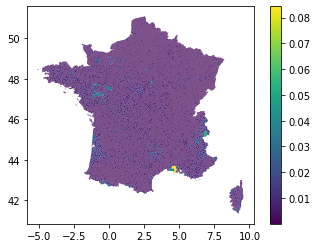

In [5]:
gdf.plot("area", legend=True)

In [6]:
diagnostic = Project.objects.all().first()
diagnostic

<Project: Diagnostic de CA Grand Auch Cœur de Gascogne>

In [7]:
polygons = MultiPolygon([Polygon(coord) for coord in diagnostic.combined_emprise.coords])

selection = gdf.intersects(polygons)

grand_coeur = gdf.loc[selection]

grand_coeur

,idcom,idreg,idregtxt,iddep,iddeptxt,epci21,epci21txt,scot,aav2020,aav2020txt,...,men1318,emp13,emp18,emp1318,mepart1318,menhab1318,artpop1318,surfcom202,geometry,area
idcomtxt,,,,,,,,,,,,,,,,,,,,,
Ansan,32002,76,Occitanie,32,Gers,200042372,CC des Coteaux Arrats Gimone,SCoT de Gascogne,145,145,...,-3,0,5,5,0.00,0.00,0.00,7751804.0,"POLYGON ((0.77531 43.67518, 0.77530 43.67590, ...",0.000865
Antras,32003,76,Occitanie,32,Gers,200066926,CA Grand Auch Cœur de Gascogne,SCoT de Gascogne,145,145,...,5,9,5,-4,7.09,35.46,-352.50,6730961.0,"POLYGON ((0.41811 43.73173, 0.41787 43.73335, ...",0.000752
Aubiet,32012,76,Occitanie,32,Gers,200042372,CC des Coteaux Arrats Gimone,SCoT de Gascogne,145,145,...,-8,300,232,-68,-2.49,-0.27,-9246.45,39211048.0,"POLYGON ((0.72334 43.66999, 0.72332 43.67076, ...",0.004372
Auch,32013,76,Occitanie,32,Gers,200066926,CA Grand Auch Cœur de Gascogne,SCoT de Gascogne,145,145,...,288,16353,16285,-68,6.00,11.82,1539.80,73407705.0,"POLYGON ((0.48821 43.63911, 0.48838 43.63970, ...",0.008185
Augnax,32014,76,Occitanie,32,Gers,200066926,CA Grand Auch Cœur de Gascogne,SCoT de Gascogne,145,145,...,4,0,5,5,8.77,3.90,932.73,3991345.0,"POLYGON ((0.76760 43.71373, 0.76633 43.71457, ...",0.000446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Saint-Sauvy,32406,76,Occitanie,32,Gers,200042372,CC des Coteaux Arrats Gimone,SCoT de Gascogne,N/A,N/A,...,-1,59,40,-19,-1.75,-0.09,-57242.50,17654424.0,"POLYGON ((0.77486 43.70222, 0.77539 43.70282, ...",0.001970
Saramon,32412,76,Occitanie,32,Gers,200042372,CC des Coteaux Arrats Gimone,SCoT de Gascogne,145,145,...,12,314,342,28,3.49,1.23,4402.00,13084070.0,"POLYGON ((0.73860 43.51958, 0.73858 43.52026, ...",0.001456
Tourrenquets,32453,76,Occitanie,32,Gers,200066926,CA Grand Auch Cœur de Gascogne,SCoT de Gascogne,145,145,...,4,12,10,-2,16.12,32.23,-155.13,7228958.0,"POLYGON ((0.68016 43.75611, 0.68118 43.75734, ...",0.000807


In [8]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

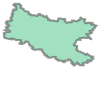

In [9]:
import shapely.wkt
# polygon = shapely.wkt.loads('POLYGON ((51.0 3.0, 51.3 3.61, 51.3 3.0, 51.0 3.0))')
wkt_str = diagnostic.combined_emprise.ewkt.split(";")[-1]
polygon = shapely.wkt.loads(wkt_str)
polygon

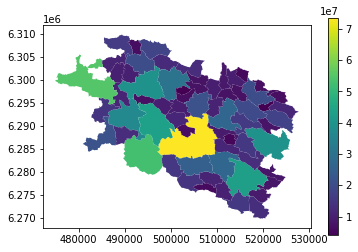

In [12]:
grand_coeur = grand_coeur.to_crs(epsg=2154)
grand_coeur["area"] = grand_coeur.area
grand_coeur.plot("area", legend=True)
plt.savefig('foo.png')

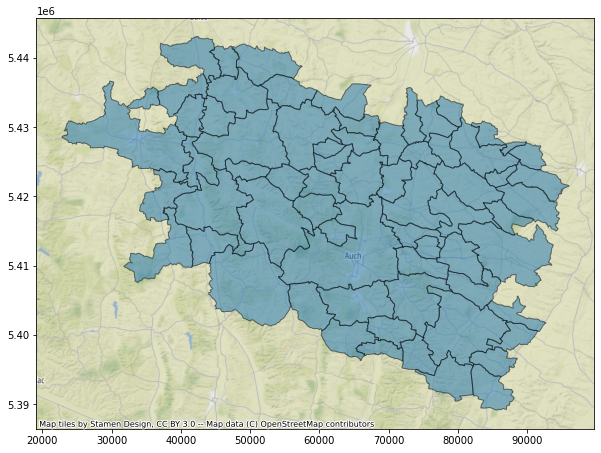

In [13]:
import contextily as cx
grand_coeur = grand_coeur.to_crs(epsg=3857)
ax = grand_coeur.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)